In [703]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import Image
from scipy.interpolate import interp2d
from scipy.misc import lena
from scipy.interpolate import RegularGridInterpolator


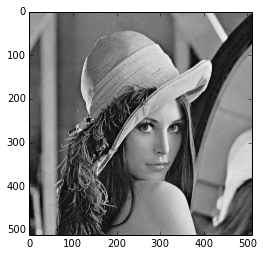

In [704]:
img = lena()
plt.imshow(img,cmap=cm.gray)
plt.show()
eye = img[240:300,300:360]

In [707]:
imgLength = img.shape[0]
shift = 2
print("Length of image is",imgLength)
angle = np.random.uniform(2*np.pi)
angle = np.pi/4
print("Angle of ",np.degrees(angle))
rotationMatrix = np.array([[np.cos(angle),-np.sin(angle),0],[np.sin(angle),np.cos(angle),0]])

('Length of image is', 512)
('Angle of ', 45.0)


In [708]:
rotationMatrix

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ]])

In [710]:
print("Rotation matrix is")
print(rotationMatrix)
x,y = np.arange(-256,256,1),np.arange(-256,256,1)

Rotation matrix is
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]]


In [722]:
interpolator = RegularGridInterpolator((x,y),img,bounds_error=False,fill_value=0)
coords = np.array([x,y,ones])

In [728]:
xx,yy = np.meshgrid(x,y)

In [740]:
xx = np.repeat(x,imgLength)
yy = np.tile(y,imgLength)

In [778]:
np.tile(np.arange(10),3)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9])

In [746]:
ones = np.ones(imgLength**2)

In [747]:
xxyy = np.vstack((xx,yy,ones))

In [748]:
xxyy.shape

(3, 262144)

In [749]:
rotationMatrix.T

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678],
       [ 0.        ,  0.        ]])

In [762]:
newCoords = np.dot(xxyy.T,rotationMatrix.T)
#newCoordsMesh = np.meshgrid(newCoords[0],newCoords[1])

In [764]:
newCoords.shape

(262144, 2)

In [765]:
xNew, yNew = newCoordsMesh
newImage = interpolator((newCoords[:,0],newCoords[:,1]))

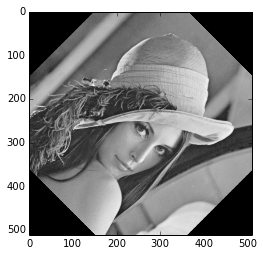

In [768]:
plt.imshow(newImage.reshape(512,512),cmap=cm.gray)
plt.show()